# Применимость закона Арпса. Подготовка данных

In [100]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Для описания дебита (суточный объем добычи) скважин, пробуренных на сланцевые пласты, часто используют закон Арпса, который существует в трех формах: экспоненциальной, гиперболической и параболической.

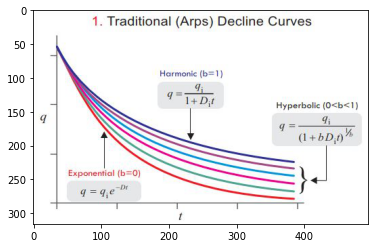

In [101]:
arps = mpimg.imread('Arps.JPG')
fig, ax = plt.subplots()
plt.imshow(arps);

В случае экспоненциального закона зависимость дебита от накопленной добычи и зависимость логарифма дебита от времени должны быть линейными, в случае гармонического линейной должна быть зависимость логарифма дебита от накопленной добычи. В случае гиперболического закона линейных зависимостей нет.

Сначала можно было бы попробовать простые варианты, которые можно свести к линейной зависимости за счет преобразования переменных. Однако в данном случае дебит часто бывает равен 0, поэтому логарифм будет уходить в бесконечность. Из простого остается только смотреть зависимость дебита от накопленной добычи в случае экспоненциальной зависимости. Если не подойдет, надо рассматривать общий случай.

В конце буду сравнивать теоретическое и экспериментальное распределение с помощью критерия Уилкоксона.

Использую весь набор данных для проверки применимости закона, но рассчитанные коэффициенты для прогонозирования использованы не будут.

In [102]:
import pandas as pd
import numpy as np

In [103]:
production_data = pd.read_csv('production_data.csv', 
                              index_col='Lease')[['Time (Days)', 'Gas Volume (MMscf)', 'Oil Volume (stb)']]\
    .rename(columns={'Time (Days)': 'day', 'Gas Volume (MMscf)': 'gas', 'Oil Volume (stb)': 'oil'})
production_data

,day,gas,oil
Lease,,,
OSPREY,1.0,0.145,504.39
OSPREY,2.0,0.186,564.76
OSPREY,3.0,0.231,653.51
OSPREY,4.0,0.268,740.71
OSPREY,5.0,0.261,678.06
...,...,...,...
GOOSE,2842.0,0.000,0.00
GOOSE,2843.0,0.000,0.00
GOOSE,2844.0,0.000,0.00


In [104]:
production_data[['cum_gas', 'cum_oil']] = production_data[['gas', 'oil']].cumsum(axis=0)
production_data

,day,gas,oil,cum_gas,cum_oil
Lease,,,,,
OSPREY,1.0,0.145,504.39,0.145000,5.043900e+02
OSPREY,2.0,0.186,564.76,0.331000,1.069150e+03
OSPREY,3.0,0.231,653.51,0.562000,1.722660e+03
OSPREY,4.0,0.268,740.71,0.830000,2.463370e+03
OSPREY,5.0,0.261,678.06,1.091000,3.141430e+03
...,...,...,...,...,...
GOOSE,2842.0,0.000,0.00,363416.692705,1.915000e+06
GOOSE,2843.0,0.000,0.00,363416.692705,1.915000e+06
GOOSE,2844.0,0.000,0.00,363416.692705,1.915000e+06


Делим на периоды между внесениями изменений в конструкцию скважин, т.к. после изменения конструкции кривая уже другая. Отбрасываем периоды короче 100 дней.

In [105]:
well_data = pd.read_csv('well_data_modified.csv', 
                              index_col=0)[[' Configuration Change (Days Since First Prod) ', 
                                           ' Configuration Change (Days Since First Prod) .1',
                                           ' Configuration Change (Days Since First Prod) .2',
                                            ' Configuration Change (Days Since First Prod) .3']]
change_times = pd.DataFrame({'production_start': 0}, index=well_data.index)
change_times = change_times.join(well_data)
change_times.columns = [0, 1, 2, 3, 4]
change_times

,0,1,2,3,4
OSPREY,0,64.0,1101.0,1302.0,1602.0
FALCON,0,61.0,123.0,196.0,NaN
HAWK,0,40.0,125.0,233.0,NaN
EAGLE,0,205.0,NaN,NaN,NaN
KITE,0,111.0,NaN,NaN,NaN
SWIFT,0,144.0,896.0,NaN,NaN
SPARROW,0,156.0,887.0,NaN,NaN
LARK,0,122.0,438.0,NaN,NaN
CARDINAL,0,119.0,486.0,NaN,NaN
JAY,0,132.0,480.0,NaN,NaN


Добавляю конец периода

In [106]:
change_times[5] = production_data.groupby(level=0).agg({'day': 'max'})
change_times

,0,1,2,3,4,5
OSPREY,0,64.0,1101.0,1302.0,1602.0,2355.000
FALCON,0,61.0,123.0,196.0,NaN,249.625
HAWK,0,40.0,125.0,233.0,NaN,249.375
EAGLE,0,205.0,NaN,NaN,NaN,1483.000
KITE,0,111.0,NaN,NaN,NaN,1066.000
SWIFT,0,144.0,896.0,NaN,NaN,1245.000
SPARROW,0,156.0,887.0,NaN,NaN,1245.000
LARK,0,122.0,438.0,NaN,NaN,783.000
CARDINAL,0,119.0,486.0,NaN,NaN,781.000
JAY,0,132.0,480.0,NaN,NaN,782.000


Получили таблицу с точками внесения изменений. Преобразуем в периоды требуемой длины.

In [107]:
def to_intevals(series, min_len=100):
    lst = series.copy()
    lst.dropna(inplace=True)
    lst = lst.to_list()
    result =[]
    for i in range(len(lst) - 1):
        if lst[i+1] - lst[i] >= min_len:
            result.append((lst[i], lst[i+1]))
    return result    

Пример работы функции:

In [108]:
to_intevals(change_times.loc['LARK', :])

[(0.0, 122.0), (122.0, 438.0), (438.0, 783.0)]

In [109]:
change_times = change_times.apply(to_intevals, axis=1, **{'min_len': 100})
change_times

OSPREY           [(64.0, 1101.0), (1101.0, 1302.0), (1302.0, 16...
FALCON                                                          []
HAWK                                              [(125.0, 233.0)]
EAGLE                              [(0.0, 205.0), (205.0, 1483.0)]
KITE                               [(0.0, 111.0), (111.0, 1066.0)]
SWIFT              [(0.0, 144.0), (144.0, 896.0), (896.0, 1245.0)]
SPARROW            [(0.0, 156.0), (156.0, 887.0), (887.0, 1245.0)]
LARK                [(0.0, 122.0), (122.0, 438.0), (438.0, 783.0)]
CARDINAL            [(0.0, 119.0), (119.0, 486.0), (486.0, 781.0)]
JAY                 [(0.0, 132.0), (132.0, 480.0), (480.0, 782.0)]
CROW                                               [(24.0, 216.0)]
LORIKEET                                          [(50.0, 4031.0)]
MYNAH                                               [(0.0, 589.0)]
PARTRIDGE                                           [(0.0, 589.0)]
CASSOWARY                                          [(0.0, 2393

При мин. длине периода 100 дней теряем скважину Falcon, но при коротких периодах поведение слишком хаотичное.

In [120]:
production_by_period = pd.DataFrame(columns = ['period'] + production_data.columns.to_list())
production_by_period

,period,day,gas,oil,cum_gas,cum_oil


In [121]:
for well in change_times.index.to_list():
    if len(change_times[well]) > 0:
        for period in change_times[well]:
            name = well + '_' + str(period[0]) + '_' + str(period[1])
            df = production_data.loc[well, :]\
                .query('day >= @period[0] & day <= @period[1]')\
                .copy()
            df['period']=name
            production_by_period = pd.concat([production_by_period, df],
                                                     axis=0)

In [122]:
production_by_period

,period,day,gas,oil,cum_gas,cum_oil
OSPREY,OSPREY_64.0_1101.0,64.0,0.027333,76.92,9.422333,2.833308e+04
OSPREY,OSPREY_64.0_1101.0,65.0,0.027333,76.92,9.449667,2.841000e+04
OSPREY,OSPREY_64.0_1101.0,66.0,0.027333,76.92,9.477000,2.848692e+04
OSPREY,OSPREY_64.0_1101.0,67.0,0.176000,493.65,9.653000,2.898057e+04
OSPREY,OSPREY_64.0_1101.0,68.0,0.117000,425.98,9.770000,2.940655e+04
...,...,...,...,...,...,...
GOOSE,GOOSE_0.0_2846.0,2842.0,0.000000,0.00,363416.692705,1.915000e+06
GOOSE,GOOSE_0.0_2846.0,2843.0,0.000000,0.00,363416.692705,1.915000e+06
GOOSE,GOOSE_0.0_2846.0,2844.0,0.000000,0.00,363416.692705,1.915000e+06
GOOSE,GOOSE_0.0_2846.0,2845.0,0.000000,0.00,363416.692705,1.915000e+06


In [123]:
production_by_period.to_csv('production_by_period.csv')